# Diffusivity

This notebook analyze the diffusivity based on the trajectory data.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import trackpy as tp
from skimage import io
from myImageLib import dirrec
import dufte
plt.style.use(dufte.style)

In [78]:
folder = '/home/zhengyang/data/DE/07202021/1st-drop-tracking/2021-07-20_16h42m46s/images'
data = pd.read_csv(os.path.join(folder, 'crop_HoughCircles', 'xyz-traj.csv'))

In [85]:
t = tp.link(data.rename(columns={'filename': 'frame'}), 30)

Frame 54321: 1 trajectories present.


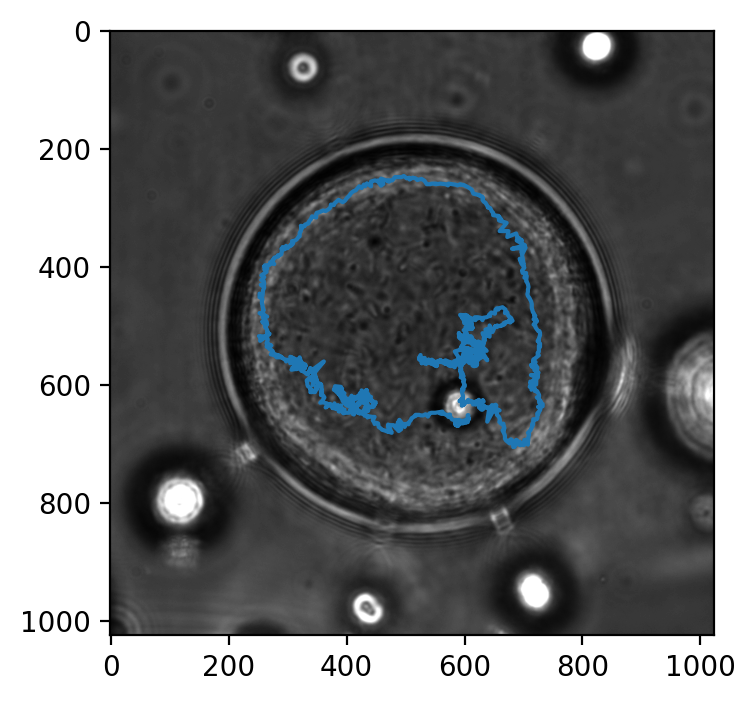

In [84]:
mpp = 0.11
l = dirrec(folder, '*.tif')
img = io.imread(os.path.join(folder, l[0]))
plt.figure(dpi=200)
plt.imshow(img, cmap='gray')
plt.plot(data.x/mpp, data.y/mpp)

In [122]:
msd = tp.msd(t, mpp=1, fps=30, max_lagtime=1500)
msd3 = tp.msd(t, mpp=1, fps=30, max_lagtime=1500, pos_columns=['z', 'x', 'y'])

In [127]:
d = 72

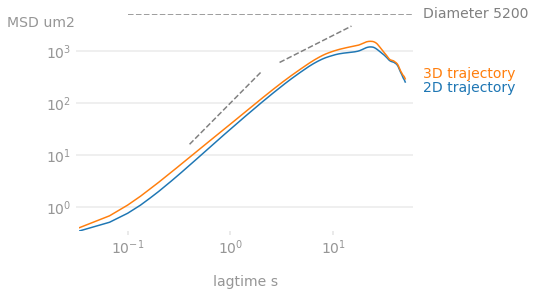

In [143]:
plt.plot(msd.lagt, msd.msd, label='2D trajectory')
plt.plot(msd3.lagt, msd3.msd, label='3D trajectory')

plt.plot([1e-1, 60], [d**2, d**2], ls='--', color='gray', label='Diameter 5200')
plt.loglog()

x = np.array([.4, 2])
y = 100 * x ** 2
plt.plot(x, y, color='gray', ls='--')

x = np.array([3, 15])
y =  200 * x ** 1
plt.plot(x, y, color='gray', ls='--')
dufte.ylabel('MSD um2')
plt.xlabel('lagtime s')
dufte.legend()

**Comments:**
- Cristian's data shows ballistic regime at ~0.02 s, diffusive regime at ~1 s and subdiffusive (plateau) regime at ~10 s. To produce data that is comparable to his, longer video with higher frame rate is necessary (80 fps for 1000 s)
- In the video(0716/3), the outer droplet moves significantly. As a result, the motion of inner droplet is affected. For more accurate analysis, I need to track the outer droplet and subtract its motion from the inner's.
- 3D trajectory is obtained (0720/16h42m). 2D and 3D MSD's are compared. They are very similar in long time limit, indicating that Z-motion is weaker than XY-motion. 3D MSD is higher in short time limit, likely due to manual tracking error.